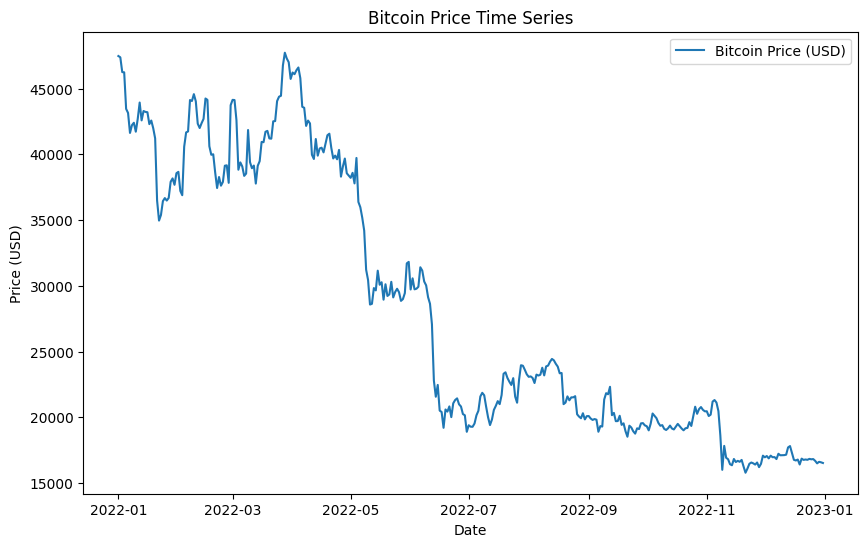

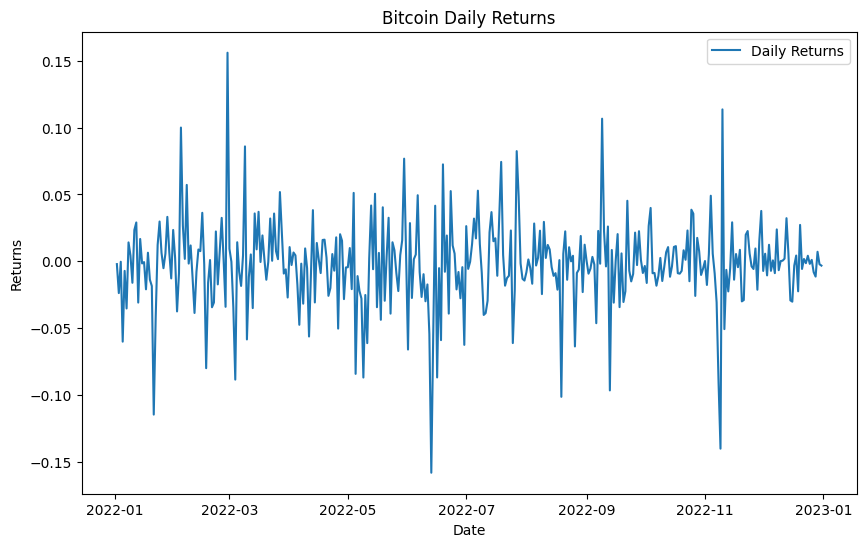

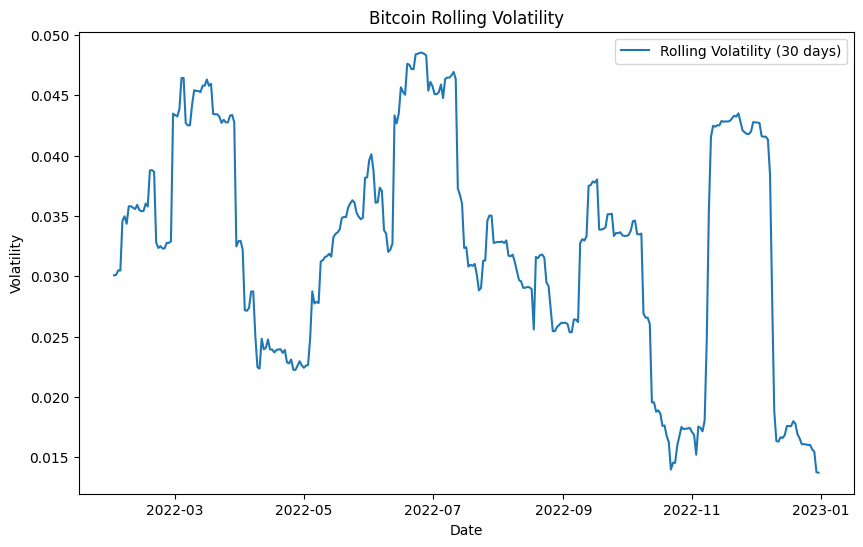

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests

# Obtain Time Series Data
bitcoin_api_url = "https://api.coindesk.com/v1/bpi/historical/close.json?start=2022-01-01&end=2022-12-31"
response = requests.get(bitcoin_api_url)
data = response.json()

dates = list(data['bpi'].keys())
prices = list(data['bpi'].values())

df = pd.DataFrame({'Date': dates, 'USD': prices})
df['Date'] = pd.to_datetime(df['Date'])

# Data Transformations
df['Returns'] = df['USD'].pct_change()
df['Log_Price'] = np.log(df['USD'])

# Plot the time series data
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['USD'], label='Bitcoin Price (USD)')
plt.title('Bitcoin Price Time Series')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

# Plot the transformed data
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Returns'], label='Daily Returns')
plt.title('Bitcoin Daily Returns')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()
plt.show()

# Data Analysis - Calculate rolling volatility
df['Volatility'] = df['Returns'].rolling(window=30).std()

# Plot the volatility
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Volatility'], label='Rolling Volatility (30 days)')
plt.title('Bitcoin Rolling Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()
